<a href="https://colab.research.google.com/github/sharjil-d/TensorFlow_Google_Colab/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# introduction to regression with neural networks in tensor flow
ex: predicting a numberical variable on other combination of variables

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


Creating data to view and fit

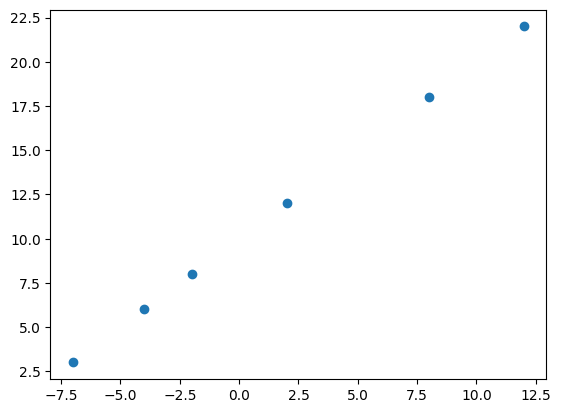

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X=np.array([-7,-4,-2,2,8,12])
#create labels
y=np.array([3,6,8,12,18,22])

#visualize
plt.scatter(X,y)

In [ ]:
y==X+10

array([ True,  True,  True,  True,  True,  True])

input and output shapes

In [ ]:
# create a demo tensor for our housing price prediction problem
house_info=tf.constant(['bedroom','bathroom','garage'])
house_price=tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X.shape

(6,)

In [ ]:
y[0].shape

()

In [ ]:
#turn numpy to tensor
X=tf.constant(X)
y=tf.constant(y)
X,y

(<tf.Tensor: shape=(6,), dtype=int64, numpy=array([-7, -4, -2,  2,  8, 12])>,
 <tf.Tensor: shape=(6,), dtype=int64, numpy=array([ 3,  6,  8, 12, 18, 22])>)

In [ ]:
X.ndim,X

(1,
 <tf.Tensor: shape=(6,), dtype=int64, numpy=array([-7, -4, -2,  2,  8, 12])>)

In [ ]:
aa=tf.expand_dims(X,axis=-1)
aa.ndim,aa

(2,
 <tf.Tensor: shape=(6, 1), dtype=int64, numpy=
 array([[-7],
        [-4],
        [-2],
        [ 2],
        [ 8],
        [12]])>)

## steps in modeling with tensorflow


1.   create a model - define input,output and hidden layer
2.   compile a model - define loss function ands evaluation metrics
3.   fitting a model



In [ ]:
# set random seed
tf.random.set_seed(42)

#1. create a model suing sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
#3. fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 411ms/step - loss: 11.5728 - mae: 11.5728
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.5403 - mae: 11.5403
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.5078 - mae: 11.5078
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 11.4753 - mae: 11.4753
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 11.4428 - mae: 11.4428


In [ ]:
# Check out X and y
X,y

(<tf.Tensor: shape=(6,), dtype=int64, numpy=array([-7, -4, -2,  2,  8, 12])>,
 <tf.Tensor: shape=(6,), dtype=int64, numpy=array([ 3,  6,  8, 12, 18, 22])>)

In [ ]:
# try and make a prediction using our model
y_pred=model.predict([17.0])
y_pred

1/1 [==============================] - 0s 61ms/step


array([[0.50034285]], dtype=float32)

Improve our model

we can imrove the model by altering steps we took to create a model
1. creating a model: add more layers, increase the number of hidden units(neurons)
2. compiling a model: we might change opt function or learning rate of opt function
3. fitting a model: fit for more epochs

In [ ]:
from keras.api._v2.keras import metrics
# lets rebuild our model

# create the model
model=tf.keras.Sequential([   # sequential means botttom to top
    tf.keras.layers.Dense(1)
])

# compile

model.compile(
    loss=tf.keras.losses.mae,  # mean absolute error
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']

)

#fit
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100) # epochs means longer training

Epoch 1/100
1/1 [==============================] - 0s 223ms/step - loss: 11.1470 - mae: 11.1470
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.1145 - mae: 11.1145
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0820 - mae: 11.0820
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0495 - mae: 11.0495
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 11.0170 - mae: 11.0170
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9845 - mae: 10.9845
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9520 - mae: 10.9520
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9195 - mae: 10.9195
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8870 - mae: 10.8870
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8545 - mae: 10.8545
Epoch 11/100
1/1 [==============================] - 0s 8m

In [ ]:
model.predict([28])

1/1 [==============================] - 0s 74ms/step


array([[49.590195]], dtype=float32)

In [ ]:
from keras.layers.attention.multi_head_attention import activation
#altering while creation

model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 287ms/step - loss: 11.0347 - mae: 11.0347
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6497 - mae: 10.6497
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.2867 - mae: 10.2867
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0192 - mae: 10.0192
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.7520 - mae: 9.7520
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 9.4818 - mae: 9.4818
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 9.2137 - mae: 9.2137
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.9317 - mae: 8.9317
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 8.6456 - mae: 8.6456
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 8.3502 - mae: 8.3502
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - los

In [ ]:
model.predict([17])

1/1 [==============================] - 0s 53ms/step


array([[31.158009]], dtype=float32)

In [ ]:
from keras.layers.attention.multi_head_attention import activation
#altering while creation

model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 392ms/step - loss: 10.6675 - mae: 10.6675
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6602 - mae: 10.6602
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6529 - mae: 10.6529
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6456 - mae: 10.6456
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6383 - mae: 10.6383
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6310 - mae: 10.6310
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6236 - mae: 10.6236
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6163 - mae: 10.6163
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6090 - mae: 10.6090
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6017 - mae: 10.6017
Epoch 11/100
1/1 [==============================] - 0s 6m

In [ ]:
model.predict([17])

1/1 [==============================] - 0s 48ms/step


array([[3.475254]], dtype=float32)

Evualate model
build a model ->? fit it -> evaluate it ->tweak a model -> fit it -> evaluate it .....

Visualition

1. the data - what data are we working with? what does it look like?

2. the model itself - what does our model look like

3. the training of a model - how does a model perform while it learns

4. the prediction of model - how to predict model line


In [ ]:
#make a bigger dataset

X=tf.range(-100,100,4)

In [ ]:
# make labels for data sert
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

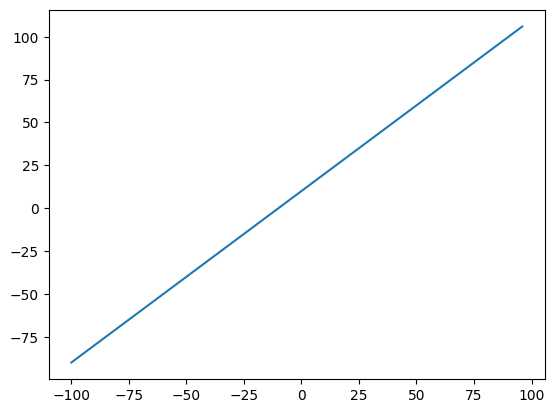

In [ ]:
plt.plot(X,y)

## 3 sets
1. **training set** - model learns from this data
2. **validation set** - model gets tuned on this data
3. **test set** - model gets evaluated on this data



In [ ]:
# check the length of how many samples we have
len(X)

50

In [ ]:
# split the data into train and test
X_train=X[:40] # first 40 samples, 80%
X_test=X[40:] # remaining

y_train=y[:40]
y_test=y[40:]


## visualize the data
visualize again


In [ ]:
# how to build neural network for our data
#1. create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.SGD(),
    metrics='mae'
)
#model.fit(X_train,y_train,epochs=100)

Visualize the summary

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
#lets create a model which builds automatically by defining input shape
# how to build neural network for our data
#1. create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])
model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.SGD(),
    metrics='mae'
)
#model.fit(X_train,y_train,epochs=100)

In [ ]:
model.summary()

total params - total number of parametrers
trainable param: patterns that model can update as it trains

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1])
])
model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.SGD(),
    metrics='mae'
)
#model.fit(X_train,y_train,epochs=100)

In [ ]:
model.summary()

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name='input_layer'),
    tf.keras.layers.Dense(1,name='output_layer')
])
model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.SGD(),
    metrics='mae'
)
#model.fit(X_train,y_train,epochs=50)

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

In [ ]:
model.fit(X_train,y_train,epochs=50)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
# lets create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c='b')
  plt.scatter(test_data,test_labels,c='g')
  plt.scatter(test_data,predictions,c='r')
  plt.legend()

In [ ]:
plot_predictions()

Evaluating our prediction with evaluation matrix
MAE - on average how wrong is each of my model prediction
MSE - square the average error

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
# calculate the mean absolute error
mae=tf.keras.losses.mean_absolute_error(y_test,tf.constant(y_pred))
mae

In [ ]:
#both y_pred and y_test are in different shape
# removing one dimension in ypred
tf.squeeze(y_pred)

In [ ]:
mae=tf.keras.losses.mean_absolute_error(y_test,tf.squeeze(y_pred))
mae

In [ ]:
mse=tf.keras.losses.mean_squared_error(y_test,tf.squeeze(y_pred))
mse

In [ ]:
def mae(y_test,y_pred):
  return tf.keras.losses.mae(y_test,tf.squeeze(y_pred))
def mse(y_test,y_pred):
   return tf.keras.losses.mse(y_test,tf.squeeze(y_pred))

## running experiments to improve model


In [ ]:
y_train.shape

In [ ]:
X_train.shape

In [ ]:
# set random seed
tf.random.set_seed(42)

model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)
model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

In [ ]:
# make and plot pred for model 1
y_preds_1=model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
#calculate model_1 evaluation matrix
mae_1=mae(y_test,y_preds_1)
mse_1=mse(y_test,y_preds_1)
mae_1,mse_1

In [ ]:
# set random seed
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(90),
    tf.keras.layers.Dense(1)
])
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mse']
)
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=89)

In [ ]:
y_preds_2=model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
mae_2=mae(y_test,y_preds_2)
mse_2=mse(y_test,y_preds_2)
mae_2,mse_2

In [ ]:
# set random seed
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mse']
)
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

In [ ]:
y_preds_3=model_3.predict(X_test)

In [ ]:
plot_predictions(predictions=y_preds_3)

In [ ]:
mae_3=mae(y_test,y_preds_3)
mse_3=mse(y_test,y_preds_3)
mae_3,mse_3

In [ ]:
#comparing the result of our experiments using pands
import pandas as pd
model_results=[
     ['model_1',mae_1.numpy(),mse_1.numpy()],
     ['model_2',mae_2.numpy(),mse_2.numpy()],
     ['model_3',mae_3.numpy(),mse_3.numpy()]
]
all_results=pd.DataFrame(model_results,columns=['model','mae','mse'])
all_results


our main goal should be minimize the time between experiments

We can track the results of our experiments
there are tools to help us



1.   Tensorboard
2.   Weights & biases



Saving our models allows us to use it in web app or mobile app

there are two main formats


1.   savemodel format
2.   HDF5 Format



In [ ]:
model_2.save("bestmodel")

In [ ]:
#save model using hdf5 format
model_2.save('best_model_hdf5.h5')

In [ ]:
# loading in saved model
loaded_saved_model=tf.keras.models.load_model('bestmodel')
loaded_saved_model.summary()

In [ ]:
model_2.summary()

A larger example

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
insurance=pd.read_csv('insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance.isnull().value_counts()

age    sex    bmi    children  smoker  region  charges
False  False  False  False     False   False   False      1338
dtype: int64

In [ ]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
insurance_onehot=pd.get_dummies(insurance)
insurance_onehot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
X=insurance_onehot.drop(columns=['charges'])
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
y=insurance_onehot['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
X.shape,y.shape

((1338, 11), (1338,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [ ]:
X_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,45,25.175,2,1,0,1,0,1,0,0,0
887,36,30.020,0,1,0,1,0,0,1,0,0
890,64,26.885,0,1,0,0,1,0,1,0,0
1293,46,25.745,3,0,1,1,0,0,1,0,0
259,19,31.920,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
109,63,35.090,0,0,1,0,1,0,0,1,0
575,58,27.170,0,1,0,1,0,0,1,0,0
535,38,28.025,1,0,1,1,0,1,0,0,0
543,54,47.410,0,1,0,0,1,0,0,1,0


In [ ]:
# build a neural network
tf.random.set_seed=42

insurance_model=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 930us/step - loss: 8631.1699 - mae: 8631.1699
Epoch 2/100
34/34 [==============================] - 0s 875us/step - loss: 7885.9961 - mae: 7885.9961
Epoch 3/100
34/34 [==============================] - 0s 878us/step - loss: 7603.3013 - mae: 7603.3013
Epoch 4/100
34/34 [==============================] - 0s 896us/step - loss: 7823.3589 - mae: 7823.3589
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7659.8521 - mae: 7659.8521
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7586.3882 - mae: 7586.3882
Epoch 7/100
34/34 [==============================] - 0s 948us/step - loss: 7565.8052 - mae: 7565.8052
Epoch 8/100
34/34 [==============================] - 0s 914us/step - loss: 7790.4629 - mae: 7790.4629
Epoch 9/100
34/34 [==============================] - 0s 908us/step - loss: 7599.0791 - mae: 7599.0791
Epoch 10/100
34/34 [==============================] - 0s 852us/step - loss: 7772.8926 

In [ ]:
X_train.shape

(1070, 11)

In [ ]:
# check the results of insurance model
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8754.3770 - mae: 8754.3770


[8754.376953125, 8754.376953125]

In [ ]:
# above is very differ
# build a neural network
tf.random.set_seed=42

insurance_model=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(1)
    ]
)
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)
insurance_model.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
34/34 [==============================] - 2s 2ms/step - loss: 13181.4561 - mae: 13181.4561
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12404.0693 - mae: 12404.0693
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 10286.6992 - mae: 10286.6992
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7721.5493 - mae: 7721.5493
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7365.3149 - mae: 7365.3149
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7326.1172 - mae: 7326.1172
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7274.5801 - mae: 7274.5801
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7233.5029 - mae: 7233.5029
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7191.0479 - mae: 7191.0479
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7148.8203 - mae: 714

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3503.5715 - mae: 3503.5715


[3503.571533203125, 3503.571533203125]

In [ ]:
# above is very differ
# build a neural network
tf.random.set_seed=42

insurance_model=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(1)
    ]
)
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)
history=insurance_model.fit(X_train,y_train,epochs=200,verbose=1)

Epoch 1/200
34/34 [==============================] - 1s 1ms/step - loss: 13177.6807 - mae: 13177.6807
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 12376.8330 - mae: 12376.8330
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 10248.6475 - mae: 10248.6475
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 7777.1587 - mae: 7777.1587
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 7441.2144 - mae: 7441.2144
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 7399.7534 - mae: 7399.7534
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 7347.2432 - mae: 7347.2432
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7307.7549 - mae: 7307.7549
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7266.3950 - mae: 7266.3950
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7225.7397 - mae: 722

Text(0, 0.5, 'loss')

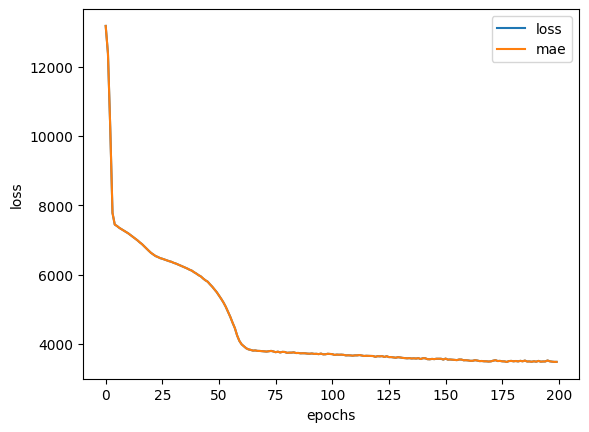

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

How long should we train for

above plot we can stop until there no much difference in epochs

Preprocessing data (normalization and stasndardization)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
insurance=pd.read_csv('insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# create a column transformer
ct=make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)
#create X and y values
X=insurance.drop(columns=['charges'])
y=insurance['charges']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#fit the column transformer to our training data
ct.fit(X_train)

#transform training and test data with normalization(Minmaxscalar)
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)


In [ ]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
tf.random.set_seed=42

insurance_model_2=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)
insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)
history=insurance_model_2.fit(X_train_normal,y_train,epochs=200,verbose=1)


Epoch 1/200
34/34 [==============================] - 1s 1ms/step - loss: 13344.1299 - mae: 13344.1299
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13335.8438 - mae: 13335.8438
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 13314.9180 - mae: 13314.9180
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 13270.8613 - mae: 13270.8613
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 13192.6338 - mae: 13192.6338
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 13069.3730 - mae: 13069.3730
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 12890.7959 - mae: 12890.7959
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 12646.7139 - mae: 12646.7139
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 12326.9678 - mae: 12326.9678
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 11927.92

<Axes: >

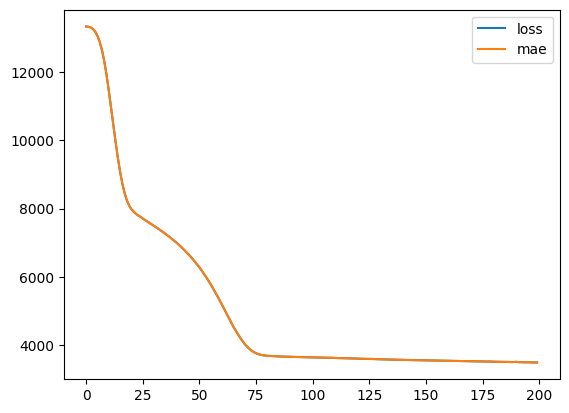

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
insurance_model_2.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3170.6426 - mae: 3170.6426


[3170.642578125, 3170.642578125]